In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
import random

In [52]:
df = pd.read_csv("covid_analytics_clinical_data.csv")
for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)
df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [53]:
sampled = df.sample(225)

[8.19154135e-03 1.16289675e-02 4.47712142e-03 8.24625138e-03
 8.71353074e-03 1.03480817e-02 9.41853473e-03 9.02680921e-03
 7.73303238e-03 8.77753875e-03 6.51741057e-03 1.59615084e-03
 6.89426092e-03 4.50071010e-03 5.53889468e-03 7.99445984e-03
 7.78035435e-03 6.79172043e-03 7.49811011e-03 1.43024127e-03
 1.51320353e-02 1.17379212e-02 1.33302203e-02 5.79951303e-03
 7.01925654e-03 7.23720191e-03 7.70628230e-03 1.14646306e-02
 9.40007833e-03 8.14442819e-03 1.43755788e-02 9.28455927e-03
 3.49356265e-03 8.23108407e-03 5.12983724e-03 5.06610315e-03
 5.93658596e-03 4.22000686e-03 5.01014665e-03 6.00563422e-03
 7.62286047e-03 3.40789075e-03 2.20789364e-03 4.07283656e-03
 1.63821784e-03 1.47620935e-03 4.12224345e-03 5.95313267e-03
 4.15537912e-03 3.70866932e-03 6.14034135e-03 2.13253923e-03
 2.70031897e-03 6.39209275e-03 2.21028946e-02 1.55667706e-02
 1.11974117e-02 1.10727934e-02 8.64713790e-03 9.18658144e-03
 7.89892719e-03 6.17649597e-03 9.94168276e-03 9.18055757e-03
 6.83749214e-03 2.655939

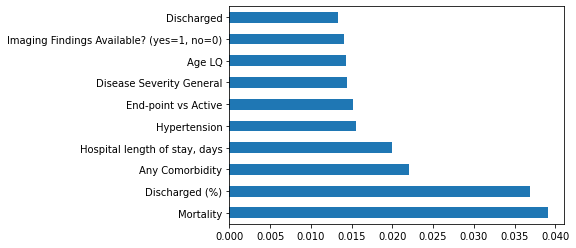

In [54]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])

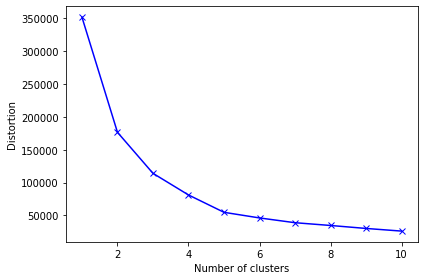

In [56]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [57]:
km = KMeans(4)

km.fit(new_df)


KMeans(n_clusters=4)

In [58]:
x = np.nan_to_num(new_df)

In [59]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)

labels = km.labels_

In [60]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-17.918142,30.489025
1,80.749147,-20.718533
2,-19.796600,-5.893345
3,-20.045976,-10.640053
4,28.939407,6.639128


In [61]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-17.918142,30.489025,3
1,80.749147,-20.718533,1
2,-19.796600,-5.893345,0
3,-20.045976,-10.640053,0
4,28.939407,6.639128,1


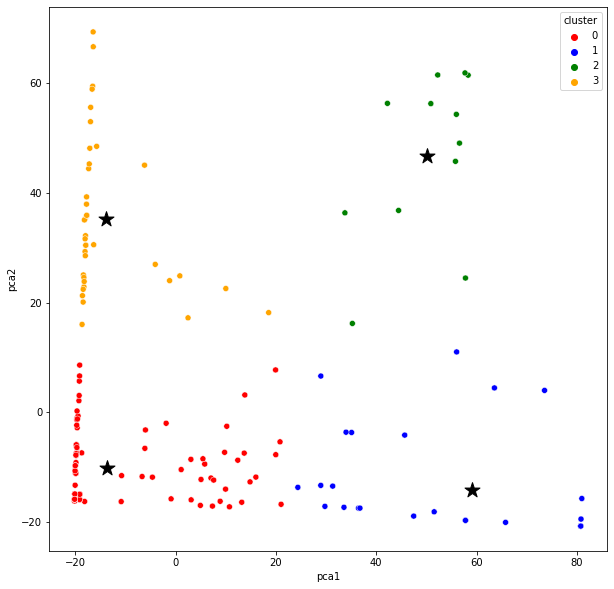

In [62]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green','orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [63]:
#10-fold validation
print("Percentage of positives")
sampled['Projected Mortality (accounting for patients not currently discharged)'].value_counts()/len(sampled)

Percentage of positives


7     0.373333
2     0.302222
1     0.075556
24    0.017778
18    0.017778
3     0.013333
11    0.013333
36    0.013333
6     0.013333
30    0.008889
10    0.008889
42    0.008889
49    0.008889
4     0.008889
52    0.008889
56    0.008889
8     0.004444
9     0.004444
5     0.004444
14    0.004444
22    0.004444
23    0.004444
60    0.004444
25    0.004444
26    0.004444
59    0.004444
29    0.004444
31    0.004444
32    0.004444
33    0.004444
37    0.004444
43    0.004444
44    0.004444
50    0.004444
51    0.004444
54    0.004444
55    0.004444
28    0.004444
Name: Projected Mortality (accounting for patients not currently discharged), dtype: float64

In [64]:
#Set up data for train
x = new_df
y = np.array(sampled['Projected Mortality (accounting for patients not currently discharged)'])
y = y.astype('int')

In [65]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [66]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.551 ( +/- 0.086)


In [67]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [68]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.551 ( +/- 0.086)


In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.8, random_state=1)

clf = LinearDiscriminantAnalysis()
clf.fit(new_df, y)

predicted = cross_val_predict(clf, new_df, y, cv=cv)


In [70]:
data = {'y_Actual': sampled['Projected Mortality (accounting for patients not currently discharged)'],
        'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

,y_Actual,y_Predicted
463,2,24
182,1,1
307,7,7
422,7,7
293,5,2
...,...,...
413,7,7
120,2,7
417,2,7
173,1,1


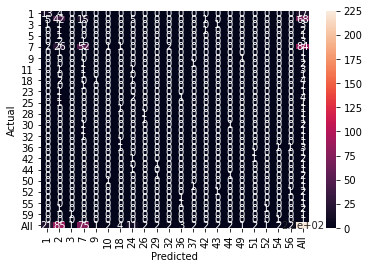

In [71]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

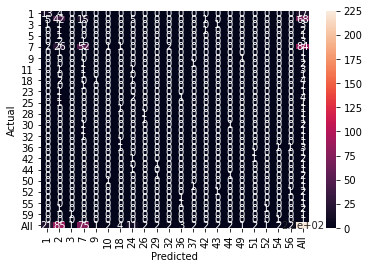

In [72]:
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()